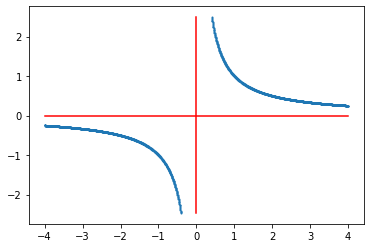

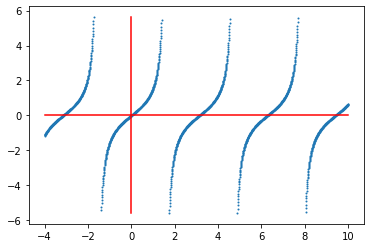

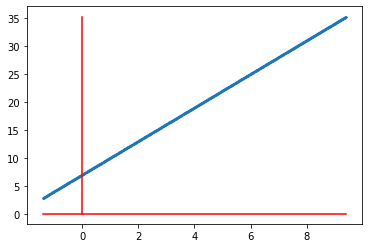

In [2]:
from matplotlib import pyplot as plt
from numpy import percentile
from math import tan


def trace(xmin, xmax, f, percent=10, axes=True, size=1, npoints=2000):
    """
    Draw f function curve, from xmin to xmax.
    
    percent : integer (default 10) => exclude percent% extreme y values, to calculate ymin / ymax 
    axes : boolean => if True (default), draw axes
    size : integer (default 1), size of points
    npoints : integer (default 2000), number of points
    """
    assert xmax != xmin and npoints > 1
    if xmax < xmin:
        xmin, xmax = xmax, xmin
    # Eg. 2 intervals for 3 points => npoints - 1
    step = (xmax - xmin) / (npoints - 1)
    
    # Points coordinates lists
    xx = [None for _ in range(npoints)]
    yy = [None for _ in range(npoints)]
    x = xmin
    for i in range(npoints):
        # Forbidden values handled 
        try:
            xx[i], yy[i] = x, f(x)
        except:
            xx[i], yy[i] = x, None
        x += step
    
    
    # Prune `percent` % of extreme values (y values below/above thresholds)
    yTop = percentile(yy, 100 - percent/2)
    yBot = percentile(yy, percent/2)
    i = 0
    while i < npoints:
        if yy[i] == None or yy[i] > yTop or yy[i] < yBot:
            xx.pop(i)
            yy.pop(i)
            npoints -= 1
        else: i += 1
    
    # Drawing
    if axes:
        plt.plot([min(min(xx),0), max((max(xx),0))], [0, 0], color='red')
        plt.plot([0, 0], [min(min(yy),0), max(max(yy),0)], color='red')
    plt.scatter(xx, yy, s=size)
    plt.show()

trace(-4, 4, lambda x:1/x)
trace(-4,10, lambda x:tan(x))
trace(-2,10, lambda x:3*x+7)